# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

Загрузим данные из файла и изучим общую информацию

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Набор данных содержит информацию о 23699 объектах недвижимости. Набор данных содержтит 22 столбца со следующими типами:
- bool(2)
- float64(14)
- int64(3)
- object(3)

## Предобработка данных

In [5]:
# посчитаем количество пропусков в данных в процентном соотношении
df.isna().mean()*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Видим, что некоторые столбцы содержат пропуски. Разберемся что с ними делать. Для столбца "balcony" если человек не указал число балконов, положим что их нет - заменим пропуски на нули

In [6]:
df.balcony.fillna(0, inplace = True)

Посмотрим на скоррелированность признаков, характеризующих размер квартиры 

In [7]:
df[['rooms', 'living_area', 'kitchen_area', 'total_area', 'floors_total']].corr()

,rooms,living_area,kitchen_area,total_area,floors_total
rooms,1.000000,0.845977,0.269945,0.758344,-0.228215
living_area,0.845977,1.000000,0.428674,0.939537,-0.169311
kitchen_area,0.269945,0.428674,1.000000,0.609121,0.163944
total_area,0.758344,0.939537,0.609121,1.000000,-0.075774
floors_total,-0.228215,-0.169311,0.163944,-0.075774,1.000000


В столбце "living_area" заполним пропуски медианным значением в зависимости от количества комнат. Также, можно было бы воспользоваться линейной регрессией от total_areа.

In [8]:
df['living_area'] = df['living_area'].fillna(df.groupby('rooms')['living_area'].transform('median'))

In [9]:
# посчитаем разницу между общей площадью и жилой
df['non_living'] = df['total_area'] - df['living_area']

# оценим корреляцию с площадью кухни
df[['non_living','kitchen_area']].corr()

,non_living,kitchen_area
non_living,1.000000,0.714379
kitchen_area,0.714379,1.000000


Коэффициент корреляции 0.71 - воспольземся линейной регрессией для восстановления пропущенных значений kitchen_area

In [10]:
x_train = np.array(df[~df['kitchen_area'].isna()]['non_living']).reshape(-1, 1)
y_train = np.array(df[~df['kitchen_area'].isna()]['kitchen_area'])
lr = LinearRegression()
lr.fit(x_train, y_train)
# запишем коэффициенты линейной регрессии
a = lr.coef_
b = lr.intercept_
# заполним пропуски c помощью линейной регрессии
df['kitchen_area'] = df['kitchen_area'].fillna(a * df['non_living'] + b)
# удалим временный столбец с разницей между общей площади и жилой
df.drop(['non_living'], axis = 1, inplace = True)

In [11]:
df.is_apartment.value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Для столбца is_apartment предположим, что если человек не указал true или false, значит объект не ялвяется апратаментом. Среди заполненных значений видим, что апартаментов в данных всего 50


In [12]:
#  Заменим пропуски is_apartment на False
df['is_apartment'].fillna(False, inplace = True)

In [13]:
df['ceiling_height'].median()

2.65

Для столбца ceiling_height для заполнения пропусков воспользуемся медианным значением. Можно предположить, что если человек не указал высоту потолков, скорее всего потолки обычной высоты. 

In [14]:
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace = True)

Для названий населенного пункта locality_name пропуски в данных оставим без изменений, заменить корректным образом пропуски в данном случае не предоставляется возможным. Учитывая малое количество пропусков (0.2%) можно и вовсе отбросить строки с пропусками в назвниях населенного пункта.

В days_exposition и floors_total не совсем очевидно как можно заполнить пропуски. Пока что оставим столбцы без изменений. Строки с пропусками в floors_total можно было бы выбросить ввиду их малого количества.

Для столбцов, характеризующих расстояния на карте и инфраструктурные объекты в некотором радусе, заполнить пропуски корректным образом не продоставляется возможным. При наличии гео-координат можно было бы воспользоваться специальными API-сервисами, например openstreetmap  

Проверим оставшиеся пропуски в данных после их заполнения, где это уместно

In [15]:
df.isna().mean()*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height           0.000000
floors_total             0.362885
living_area              0.000000
floor                    0.000000
is_apartment             0.000000
studio                   0.000000
open_plan                0.000000
kitchen_area             0.000000
balcony                  0.000000
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Проверим типы данных и преобразуем их в нужные. 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [17]:
df[['first_day_exposition']].head()

,first_day_exposition
0,2019-03-07T00:00:00
1,2018-12-04T00:00:00
2,2015-08-20T00:00:00
3,2015-07-24T00:00:00
4,2018-06-19T00:00:00


first_day_exposition содержит даты публикации, а тип данных, который автоматически определил пандас - object. приведем к datetime 

In [18]:
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

Для столбцов days_exposition, floors_total, которые содержат количество дней и количество этажей (целые числа), но по умолчанию определенные как float, заменим тип данных на целочисленный. Будем использовать специальный тип Int64 пандаса (https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html), который позволяет хранить также пустые значения.

In [19]:
df[['days_exposition','floors_total']] = df[['days_exposition','floors_total']].round().astype('Int64')

In [20]:
# проверим данные на наличие дубликатов
df.duplicated().sum()

0

данные не содержат явных дубликатов

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [22]:
df[['total_area',
    'living_area', 
    'ceiling_height']] = df[['total_area',
                             'living_area',
                             'ceiling_height']].astype('float32')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float32       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float32       
 6   floors_total          23613 non-null  Int64         
 7   living_area           23699 non-null  float32       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу следующие параметры:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [24]:
# цена кв.м
df['sq_meter_price'] = df['last_price']/df['total_area']

#день недели, месяц и год публикации
df['publ_dayweek'] = pd.DatetimeIndex(df['first_day_exposition']).day_name()
df['publ_month'] = pd.DatetimeIndex(df['first_day_exposition']).month_name()
df['publ_year'] = pd.DatetimeIndex(df['first_day_exposition']).year

# этаж квартиры
df.loc[df['floor'] == 1, 
       'floor_category'] ='первый'

df.loc[df['floor'] == df['floors_total'], 
       'floor_category'] ='последний'

df.loc[(df['floor'] !=1) &
       (df['floor'] != df['floors_total']), 
       'floor_category'] ='другой'

# соотношение жилой и общей площади, а также отношение площади кухни к общей.
df['living_ratio'] = df['living_area']/df['total_area']
df['kitchen_ratio'] = df['kitchen_area']/df['total_area']

Найдем новые параметры в последнийх столбцах таблицы 

In [25]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,publ_dayweek,publ_month,publ_year,floor_category,living_ratio,kitchen_ratio
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,...,2.0,755.0,<NA>,120370.370370,Thursday,March,2019,другой,0.472222,0.231481
1,7,3350000.0,40.400002,2018-12-04,1,2.65,11,18.600000,1,False,...,0.0,NaN,81,82920.788947,Tuesday,December,2018,первый,0.460396,0.272277
2,10,5196000.0,56.000000,2015-08-20,2,2.65,5,34.299999,4,False,...,2.0,574.0,558,92785.714286,Thursday,August,2015,другой,0.612500,0.148214
3,0,64900000.0,159.000000,2015-07-24,3,2.65,14,45.000000,9,False,...,3.0,234.0,424,408176.100629,Friday,July,2015,другой,0.283019,0.204132
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14,32.000000,13,False,...,1.0,48.0,121,100000.000000,Tuesday,June,2018,другой,0.320000,0.410000
5,10,2890000.0,30.400000,2018-09-10,1,2.65,12,14.400000,5,False,...,NaN,NaN,55,95065.790667,Monday,September,2018,другой,0.473684,0.299342
6,6,3700000.0,37.299999,2017-11-02,1,2.65,26,10.600000,6,False,...,0.0,NaN,155,99195.712485,Thursday,November,2017,другой,0.284182,0.386059
7,5,7915000.0,71.599998,2019-04-18,2,2.65,24,30.500000,22,False,...,0.0,NaN,<NA>,110544.695093,Thursday,April,2019,другой,0.425978,0.263966
8,20,2900000.0,33.160000,2018-05-23,1,2.65,27,15.430000,26,False,...,NaN,NaN,189,87454.765179,Wednesday,May,2018,другой,0.465320,0.265682
9,18,5400000.0,61.000000,2017-02-26,3,2.50,9,43.599998,7,False,...,0.0,NaN,289,88524.590164,Sunday,February,2017,другой,0.714754,0.106557


## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков.

In [26]:
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']

In [27]:
# описатеьная статистика 
df[columns].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,23699.000000
mean,60.348648,6.541549e+06,2.070636,2.724358
std,35.654083,1.088701e+07,1.078405,0.988298
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.900002,6.800000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,100.000000


 Построим гистограммы для каждого параметра.

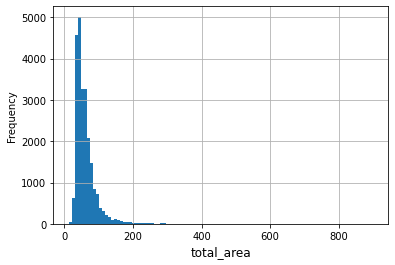

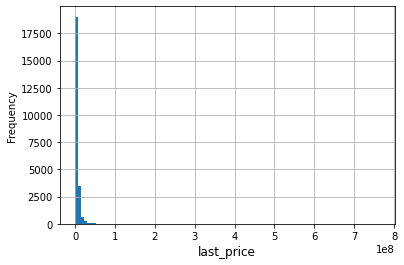

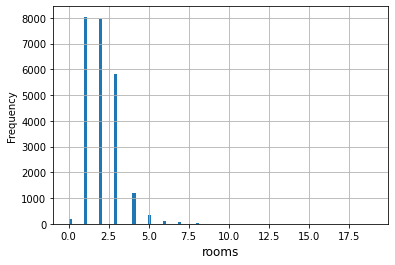

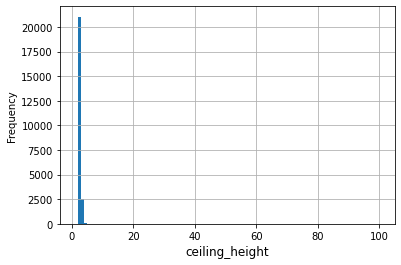

In [28]:
for col in columns: 
    ax=df.plot(
        y = col, 
        kind = 'hist', 
        bins = 100,
        grid = True,
        legend=False
            )
    ax.set_xlabel(col,
                 fontsize = 12)

Обращаем внимание, что столбцы содержат много редких и выбивающихся высоких значений. Например, для last_price это значения выше 100 000 000, для ceiling_height это значения выше 5. 

Изучим время продажи квартиры. Построим гистограмму

Text(0.5, 0, 'days_exposition')

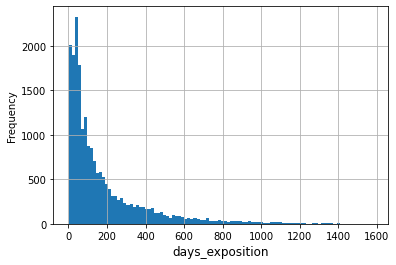

In [29]:
ax = df['days_exposition'].plot(
    kind='hist',  
    grid=True, 
    bins=100,
    legend = False)

ax.set_xlabel('days_exposition',
                 fontsize = 12)

Видим, что построенная гистограмма имеет длинный хвост с высокими значениями и внешне напоминает распределение Пуассона

Для оценки среднего и медианы воспользуемся методом описательной статистики describe()

In [30]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее: 180, Медиана: 95

Видим, что в среднем продажа кваритры занимает 180 дней, однако медианное значение почти в 2 раза меньше - 95 дней. Это объясняется тем, что распределение имеет длинный хвост с высокими значениями 

In [31]:
# Также оценим модальное значение
df['days_exposition'].mode()

0    45
dtype: Int64

Можно сделать вывод, что чаще всего время продажи квартиры занимает 45 дней

Чтобы понять, когда продажи прошли слишком быстро, а когда слишком много, оценим квантили 0.01 и 0.99:

In [32]:
df['days_exposition'].quantile([0.01, 0.99])

0.01        4.0
0.99    1068.66
Name: days_exposition, dtype: object

- Будем считать, что если days_exposition менее 4 дней - значит продажа прошла очень быстро  
- Будем считать, что если days_exposition более 1068 дней - значит продажа шла необычно долго  

Для дальнейшей работы отбросим слишком редкие и выбивающиеся высокие значения, основываясь на проведенном анализе для длительности продажи, площади, цены, числа комнат, высоты потолков

In [33]:
df = df.query(
    'days_exposition<=1068 and total_area<=400 and last_price<=1e8 and rooms<=12 and 2.5<=ceiling_height<=12'
            ).reset_index(drop=True)

Ответим на вопрос: какие факторы больше всего влияют на стоимость квартиры?
- Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. 

Чтобы оценить влияние стоимости от числа комнат, построим сводную таблицу

In [34]:
rooms_pv = df.pivot_table(index = 'rooms',
               values = 'last_price',
               aggfunc = 'median').sort_values(by = 'last_price', ascending = False)
rooms_pv

,last_price
rooms,
11,33000000.0
10,27750000.0
9,24250000.0
7,22190000.0
8,22190000.0
6,17704300.0
5,12800000.0
4,8700000.0
3,6050000.0


<AxesSubplot:xlabel='rooms'>

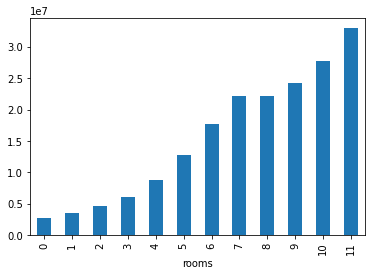

In [35]:
rooms_pv.sort_values(by = 'rooms', 
                     ascending = True).plot(kind='bar',
                                            legend = False)

Видим, что с увеличением количества комнат медианная стоимость закономерно растет

Для оценки зависимости стоимости от плошади и удаленности построим диаграммы рассеяния 

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

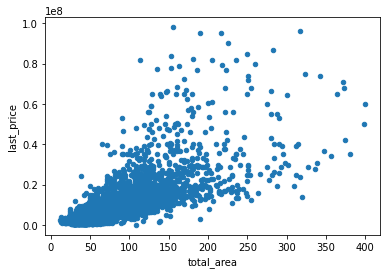

In [36]:
df.plot(kind='scatter',
        y='last_price',
        x='total_area'
       )

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

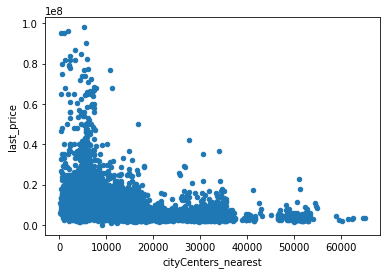

In [37]:
df.plot(kind='scatter',
        y='last_price',
        x='cityCenters_nearest'
       )

Видим, что из рассматриваемых признаков стомость имеет видимую линейную связь только с общей площадью. Оценим также коэффициент корреляции

In [38]:
df[['last_price','cityCenters_nearest', 'total_area']].corr()

,last_price,cityCenters_nearest,total_area
last_price,1.000000,-0.294783,0.756033
cityCenters_nearest,-0.294783,1.000000,-0.230452
total_area,0.756033,-0.230452,1.000000


Действительно, коэффициент корреляции Пиросона составляет 0.756, что говорит об уверенной ленейной зависимости цены от общей площади

- Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Для этого построим сводную таблицу медианной цены для разных групп этажей

In [39]:
floors_pv = df.pivot_table(index = 'floor_category',
                           values = 'last_price',
                            aggfunc = 'median').sort_values(by = 'last_price', ascending = False)
floors_pv

,last_price
floor_category,
другой,4690000.0
последний,4230000.0
первый,3800000.0


<AxesSubplot:xlabel='floor_category'>

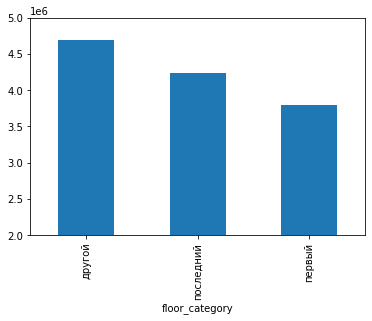

In [40]:
floors_pv.plot(kind='bar',
               legend = False,
               ylim = (2000000, 5000000))

Видим, что цена квартиры зависит от этажа: Квартиры на первом этаже продаются дешевле всех. Квартиры на на последнем этаже также дешевле квартир, расположенных между первым и последним.

- Изучим зависимость цены от даты размещения: дня недели, месяца и года.

,last_price
publ_dayweek,
Tuesday,4600000.0
Thursday,4550000.0
Wednesday,4539000.0
Monday,4500000.0
Saturday,4500000.0
Friday,4490000.0
Sunday,4450000.0


,last_price
publ_month,
September,4620000.0
November,4600000.0
April,4550000.0
December,4550000.0
August,4500000.0
February,4500000.0
January,4500000.0
July,4500000.0
May,4500000.0


,last_price
publ_year,
2014,6800000.0
2015,5078500.0
2019,4780000.0
2016,4500000.0
2017,4500000.0
2018,4499000.0


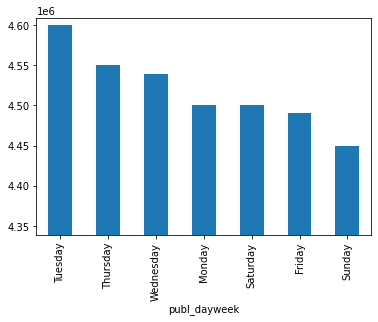

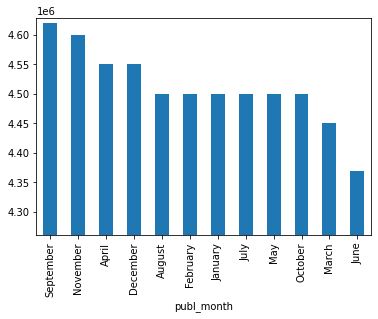

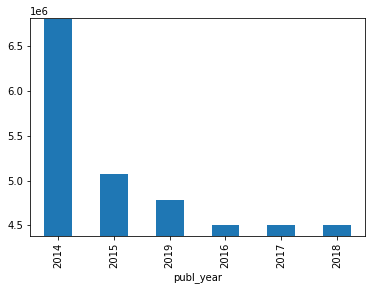

In [41]:
for col in ['publ_dayweek', 'publ_month', 'publ_year']:
    pv = df.pivot_table(index=col,
                        values='last_price',
                        aggfunc='median').sort_values(by='last_price', ascending=False)
    display(pv)
    
    pv.plot(kind='bar',
            legend = False,
            ylim = (pv.min().values*0.975, pv.max().values*1.002)
            )


Видим, что цены квартир не сильно меняются в зависимости от дней недели и месяца. Самые высокие цены наблюдаются по вторникам, самые низкие цены приурочены к концу недели - воскресенью, пятнице и субботе. Самая высокая медианная стоимость квартир - в сентябре, самая низкая - в июне.
Для года видим следующую особенность: в 2014 году медианная цена существенно выше остальных лет. 

In [42]:
# Построим корреляцию для нужных параметров
df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.756033,0.463624,-0.294783
total_area,0.756033,1.000000,0.780661,-0.230452
rooms,0.463624,0.780661,1.000000,-0.175499
cityCenters_nearest,-0.294783,-0.230452,-0.175499,1.000000


Видим, что цена хорошо линейно коррелирует (r>0.7) только с общей площадью. Также убедимся в этом с помошью матрицы диаграмм рассеяния для этих параметров.

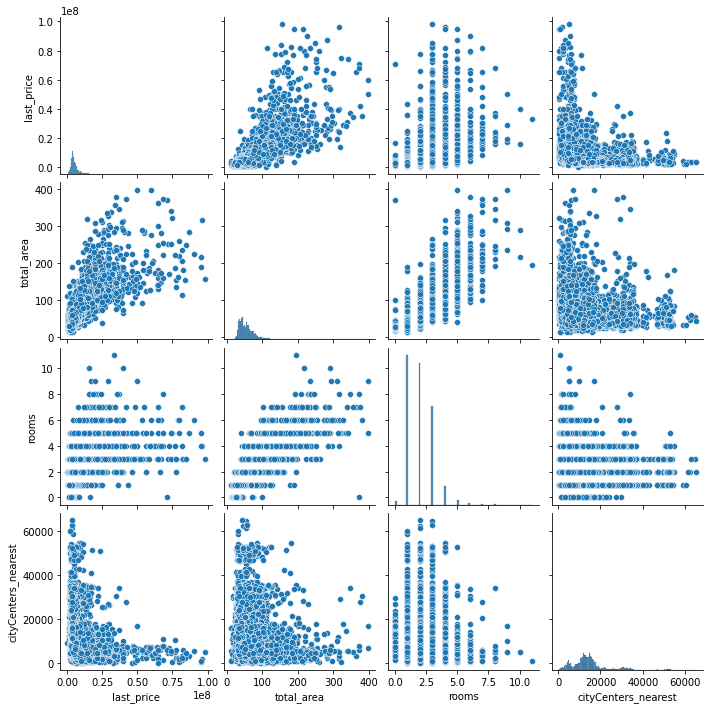

In [43]:
sns.pairplot(df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])

Видим, что поведение зависимости цены от числа комнат схоже с зависимостью цены от общей площади (это закономерно, т.к. число комнат коррелирует с общей площадью), но дисперсия достаточно высокая при средних и высоких значениях.  Здесь также видно, что число комнат имеет дискретный вид в отличие от других непрерывных параметров. Для каждого значения rooms имееется целый набор значений last_price. 

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. 

In [44]:
# 10 населённых пунктов с наибольшим числом объявлений
top10 = df.groupby('locality_name')['total_area'].count().sort_values(ascending=False).head(10)

,sq_meter_price
locality_name,
Санкт-Петербург,111019.380683
Пушкин,102256.192298
деревня Кудрово,92420.444460
посёлок Парголово,89453.555383
посёлок Мурино,85854.572737
посёлок Шушары,77963.583850
Колпино,74823.036087
Всеволожск,68593.794538
Гатчина,67938.480240


<AxesSubplot:xlabel='locality_name'>

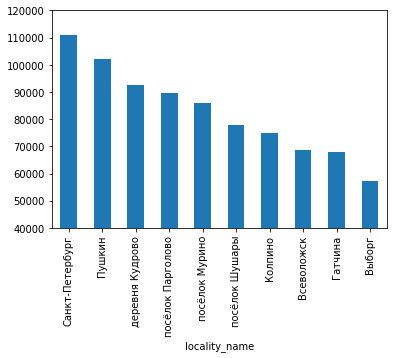

In [45]:
# Посчитаем среднюю цену квадратного метра в этих населённых пунктах.
locality_pivot = df.query('locality_name in @top10.index').pivot_table(index = 'locality_name',
                                                                       values = 'sq_meter_price',
                                                                       aggfunc = 'mean'
                                                                       ).sort_values(by = 'sq_meter_price',
                                                                                     ascending = False)
display(locality_pivot)
locality_pivot.plot(kind = 'bar',
                   legend = False,
                   ylim = (40000, 120000))

Таким образом, населенные пункты c наибольшей средней стоимостью квадратного метра: 
- Санкт-Петербург
- Пушкин

Населенные пункты c наименьше средней стоимостью квадратного метра: 
- Гатчина
- Выборг


Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге. 

In [46]:
df_spb = df.query('locality_name == "Санкт-Петербург"').reset_index(drop=True)

Выясним, какая область входит в центр. 

In [47]:
# Создадим столбец с расстоянием до центра в километрах: округлим до целых значений
df_spb['city_center_km'] = (df_spb['cityCenters_nearest']/1000).round()

<AxesSubplot:xlabel='city_center_km'>

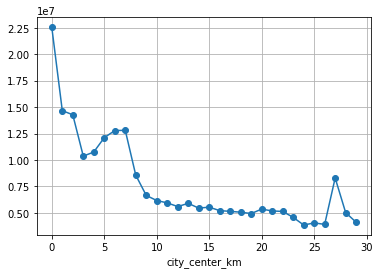

In [48]:
# посчитаем среднюю цену для каждого километра, построим график, показывающий, как цена зависит от удалённости от центра
df_spb.groupby('city_center_km')['last_price'].mean().plot(kind='line', 
                                                           grid=True, 
                                                           style='o-')

Можно видеть резкое изменение поведения графика при значениях 6 км от центра города - определим это за границу центральной зоны 

In [49]:
df_spb_center = df_spb.query('city_center_km<=6')

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков

In [50]:
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']

Построим гистограммы для каждого параметра для общего набора данных после оброса редких и выбивающихся значений

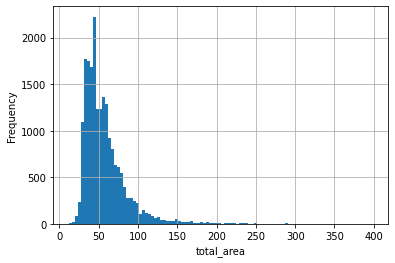

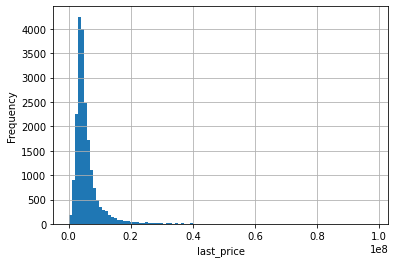

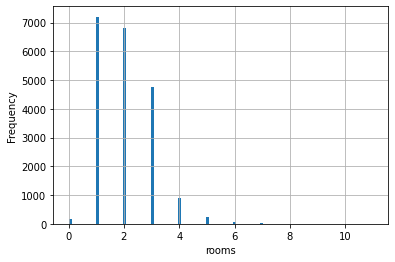

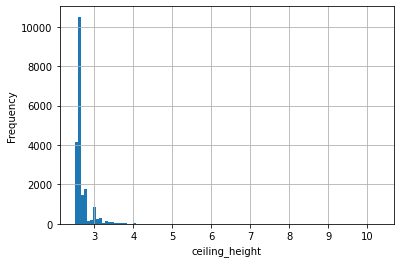

In [51]:
for col in columns: 
    ax = df.plot(
        y = col, 
        kind = 'hist', 
#         title = col, 
        bins = 100,
        grid = True,
        legend = False
            )
    ax.set_xlabel(col)

 Построим гистограммы для каждого параметра для центра Санкт-Петербурга

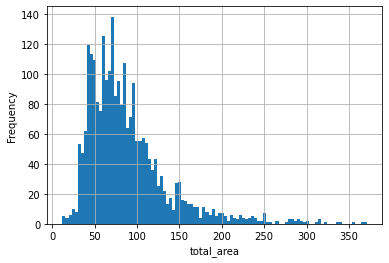

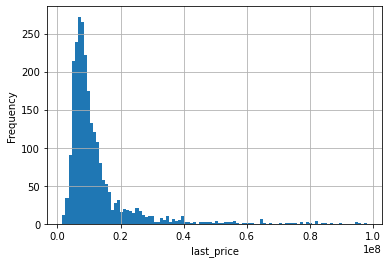

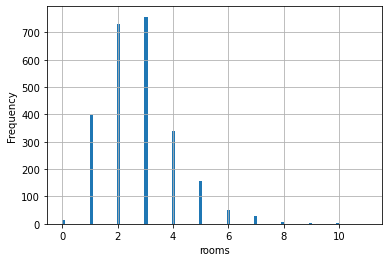

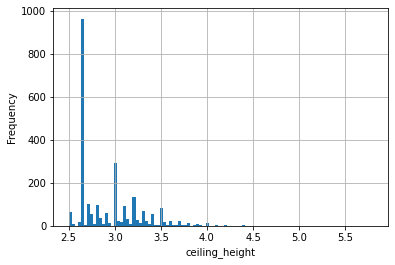

In [52]:
for col in columns: 
    ax=df_spb_center.plot(
        y = col, 
        kind = 'hist', 
#         title = col, 
        bins = 100,
        grid = True,
        legend = False
            )
    ax.set_xlabel(col)

Можно отметить следующее: на гистограмме цены для центра больше высоких значений от 20 000 000, а также больше высоких значений (выше 150) на гитсограмме total_area. В центре Санкт-Петербурга в продаже преобладают 2 и 3-комнатные квартиры, а по всему набору данных преобладают 1 и 2-комнатные

Для оценки зависимости стоимости от плошади и удаленности построим диаграммы рассеяния 

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

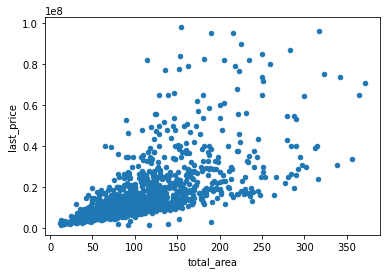

In [53]:
df_spb_center.plot(kind='scatter',
        y='last_price',
        x='total_area'
       )

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

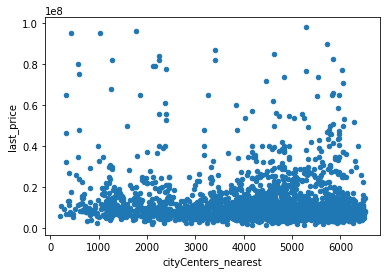

In [54]:
df_spb_center.plot(kind='scatter',
        y='last_price',
        x='cityCenters_nearest'
       )

Здесь выводы полностью аналогичны выводам по общему датасету. Видим, что из рассматриваемых признаков стомость имеет видимую линейную связь только с общей площадью.

In [55]:
rooms_center_pv = df_spb_center.pivot_table(index = 'rooms',
               values = 'last_price',
               aggfunc = 'median').sort_values(by = 'last_price', ascending = False)
rooms_center_pv

,last_price
rooms,
11,33000000.0
10,27750000.0
9,23000000.0
7,22190000.0
8,19900000.0
6,18338500.0
5,13850000.0
4,11270000.0
3,9590000.0


<AxesSubplot:xlabel='rooms'>

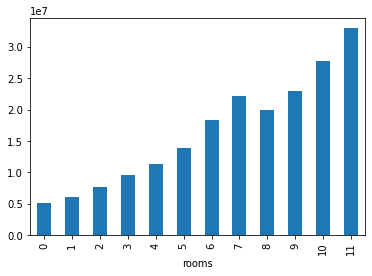

In [56]:
rooms_center_pv.sort_values(by = 'rooms', 
                            ascending = True).plot(kind='bar',
                                                   legend = False)

Аналогично общему датасету, при увеличении числа комнат, медианная стоимость квартир растет

- Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Для этого построим сводную таблицу медианной цены для разных групп этажей

In [57]:
floor_center_pivot = df_spb_center.pivot_table(index = 'floor_category',
                                               values = 'last_price',
                                               aggfunc = 'median').sort_values(by = 'last_price', ascending = False)
floor_center_pivot

,last_price
floor_category,
другой,9300000.0
последний,8800000.0
первый,6300000.0


<AxesSubplot:xlabel='floor_category'>

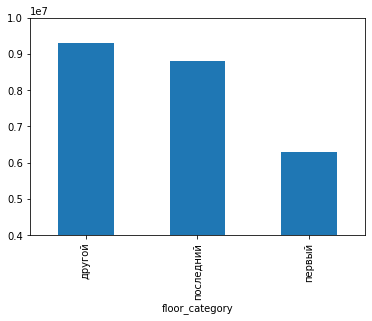

In [58]:
floor_center_pivot.plot(kind='bar',
                        legend = False,
                        ylim = (4e6, 10e6))

Видим, что аналогично общему датасету, цена квартиры зависит от этажа: Квартиры на первом этаже продаются дешевле всех. Квартиры на на последнем этаже также дешевле квартир, расположенных между первым и последним.

- Изучим зависимость цены от даты размещения: дня недели, месяца и года.

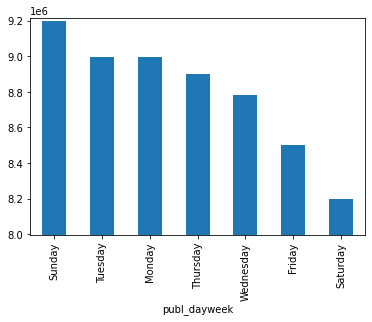

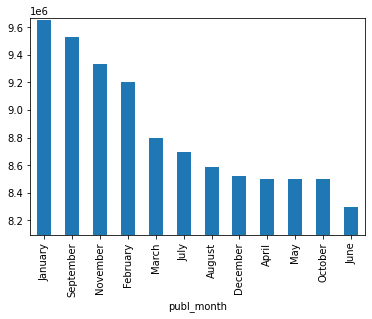

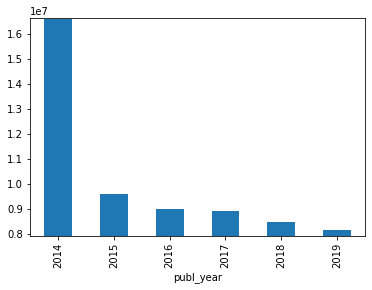

In [59]:
for col in ['publ_dayweek', 'publ_month', 'publ_year']:
    pv = df_spb_center.pivot_table(index=col,
                                          values='last_price',
                                          aggfunc='median').sort_values(by='last_price', ascending=False)
    
    pv.plot(kind='bar',
            legend = False,
            ylim = (pv.min().values*0.975, pv.max().values*1.002)
            )


Видим, что центре Санкт-Петербурга самые высокие медианные цены публикации квартир - в воскресенье, самые низкие - в птяницу и субботу. Самые высокие цены на квартиры в январе, самые низкие - в июне. Для года видим особенность, аналогичную общему датасету особенность: в 2014 году медианная цена существенно выше остальных лет.

Во многом, найденные закономерности и выводы, сделанные для центра Санкт-Петербурга соотвествуют выводам, сделанныим для всего набора даннных. Различие в выводах наблюдается для даты публикации объявления, а также в распределениях цены, площади и кол-во комнат комнат

In [60]:
df_spb_center[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.699532,0.395843,-0.049291
total_area,0.699532,1.000000,0.773240,-0.089365
rooms,0.395843,0.773240,1.000000,-0.160341
cityCenters_nearest,-0.049291,-0.089365,-0.160341,1.000000


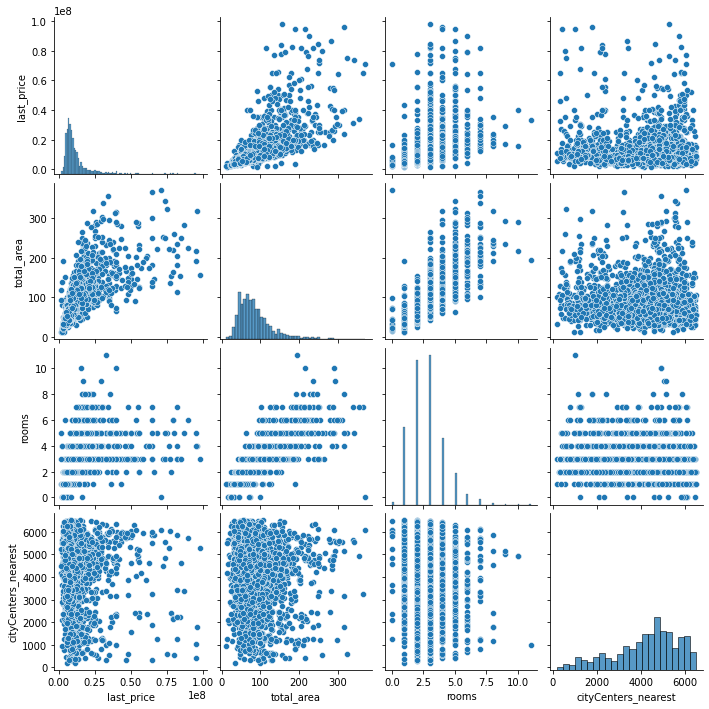

In [61]:
sns.pairplot(df_spb_center[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])

Аналогично общему датасету, видим, что поведение зависимости цены от числа комнат схоже с зависимостью цены от общей площади (это закономерно, т.к. число комнат коррелирует с общей площадью), но дисперсия достаточно высокая при средних и высоких значениях.  Здесь также видно, что число комнат имеет дискретный вид в отличие от других непрерывных параметров. Для каждого значения rooms имееется целый набор значений last_price.

## Общий вывод

Было проведено исследование объявлений о продаже квартир в в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 
1. Исходный набор данных был предобработан: были заполены пропуски в столбцах где это уместно, данные были приведены к нужным типам. 



2. В исходную таблицу были  добавлены следующие параметры: 
-  цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

3. Проведен исследовательский анализ данных. Основные наблюдения и выявленные особенности в данных: 
- Чаще всего время продажи квартиры занимает 45 дней
- Если срок размещения объявления менее 4 дней - значит продажа прошла очень быстро; Если срок размещения более 1068 дней - значит продажа шла необычно долго
- Населенные пункты c наибольшей средней стоимостью квадратного метра: Санкт-Петербург, Пушкин
- Населенные пункты c наименьше средней стоимостью квадратного метра: Гатчина, Выборг
- Цены на квартиры в объявления закономерно растут с увеличением комнат
- Наблюдается линейная зависимость цен от общей площади квартиры
- Цена квартиры зависит от этажа: Квартиры на первом этаже продаются дешевле всех. Квартиры на на последнем этаже также дешевле квартир, расположенных между первым и последним
- В Санкт-Петербурге можно видеть резкое изменение поведения графика при значениях 6 км от центра города - данное значение было принятно за границу центральной зоны 
- Для всей базы объявлений самые высокие цены наблюдаются по вторникам, самые низкие цены приурочены к концу недели - воскресенью, пятнице и субботе. Самая высокая медианная стоимость квартир - в сентябре, самая низкая - в июне.
- Для центра Санкт-Петербурга самые высокие медианные цены публикации квартир - в воскресенье, самые низкие - в птяницу и субботу. Самые высокие цены на квартиры в январе, самые низкие - в июне.
- Для года наблюдается следующая особенность: в 2014 году медианная цена существенно выше остальных лет. 
- В центре Санкт-Петербурга больше квартир с ценой от 20 000 000, а также больше квартир с площадью от 150кв.м. по сравнению с общим набором данных 
- В центре Санкт-Петербурга в продаже преобладают 2 и 3-комнатные квартиры, а по всему набору данных преобладают 1 и 2-комнатные
